# Simple Linear Regression using Python

AIM: To fit a Simple Linear Regression Model using the given data on students and use it to predict the percentage of marks that a student is expected to score based on the number of hours he/she has studied.


In [26]:
#Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
# Importing the dataset

dataset = pd.read_csv('Student.csv')
X = dataset.iloc[:, :-1].values #hours
y = dataset.iloc[:, -1].values #scores

In [28]:
print("A glimpse of the dataset:")
dataset.head()

A glimpse of the dataset:


,hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


To get an idea about the relationship between the variables X and y, we plot the data points on a graph and observe any patters formed. 

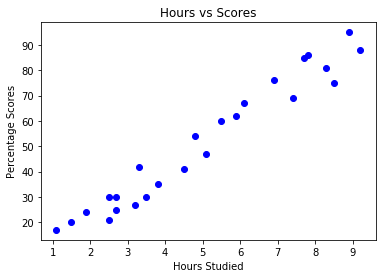

In [39]:
plt.scatter(X,y, color = 'blue')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

An upward sloping pattern on the above graph implies there is a positive linear relationship between X and y. Hence, a Simple Linear Regression Model is appropriate for the given data.

In [30]:
#Splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [31]:
#Fitting the SLRM (using the training set)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
regressor.coef_ #coefficient of X

array([9.91065648])

In [33]:
regressor.intercept_ #intercept

2.018160041434683

In [34]:
print('The regression equation can be written as:')
print('scores=',regressor.intercept_,'+',regressor.coef_,'hours')

The regression equation can be written as:
scores= 2.018160041434683 + [9.91065648] hours


In [35]:
#Predicting results (using the testing set)

y_pred = regressor.predict(X_test)
pd.DataFrame({'Actual_y':y_test, 'Predicted_y':y_pred})

,Actual_y,Predicted_y
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [36]:
#Finding y when X=9.25
print('The predicted score if a student studies for 9.25hrs per day:')
x_new=np.array([[9.25]])
regressor.predict(x_new.reshape(1,-1))

The predicted score if a student studies for 9.25hrs per day:


array([93.69173249])

In [37]:
#Evaluating the Model (using Accuracy Measures)

print('R-squared value for the SLRM obtained:')
regressor.score(X_train, y_train)

R-squared value for the SLRM obtained:


0.9515510725211553

In [38]:
print('Mean Squared Error for the given model is:')
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test,y_pred)

Mean Squared Error for the given model is:


21.5987693072174

By observing the accuracy measure values we can conclude that the chosen regression model is a good fit for the given dataset.

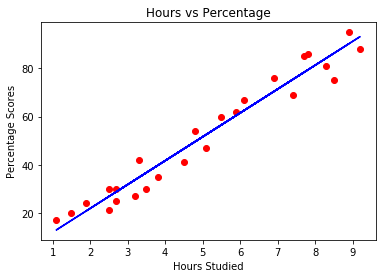

In [40]:
#Visualizing the results

plt.scatter(X,y, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()
